###### Final Project Binar Academy Data Science Training_Adrian Maulana Muhammad

# Table of Contents
- [Business Understanding]()
- [Install & Import Libraries]()
- [Import Data]()
- [Data Observation]()
- [Exploratory Data Analysis & Statistical Analysis]()
- [Data Pre-processing]()
- [Machine Learning]()
- [Summaries]()
- [Recommendation]()

# Business Understanding
The telecom industry is growing rapidly due to consumers' increasing reliance on internet communication. This has created intense competition among telecom companies and ISPs, giving customers more choice. Customer Churn occurs when customers switch providers, leading to a decrease in revenue for the original provider. To address this, telecom companies must understand the drivers of Customer Churn, improve service quality, offer competitive pricing, and provide additional benefits to retain customers. Addressing Customer Churn is crucial for maintaining a competitive advantage and success in the telecom industry.

![](https://www.ibef.org/assets/images/Telecom-Industry-2.jpg)

# Install & Import Libraries

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install plotly-express
#!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import Dataset
Pertama, saya akan melakukan import pada file datasets yang akan diolah pada project ini.

In [ ]:
from google.colab import files

file_dataset = files.upload()
file_predict = files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


Untuk memudahkan pengolahan data, file csv saya konversi menjadi pandas dataframe.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

df = pd.read_csv(io.StringIO(file_dataset['train.csv'].decode('utf-8')))
df_predict = pd.read_csv(io.StringIO(file_predict['test.csv'].decode('utf-8')))
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


Tahapan-tahapan dalam pengerjaan projek ini adalah sebagai berikut:
1. Data Observation
2. Exploratory Data Analysis (EDA) & Statistical Analysis
3. Data Pre-processing
4. Machine Learning

# Data Observation
Pada tahapan ini, kita akan mengamati dan menganalisis karakteristik dari dataset yang kita miliki. Tema utama dari projek dan data yang kita miliki adalah mengenai **Customer Churn** atau hak dari pelanggan dalam memilih produk yang sesuai dan dapat beralih dari produk sebelumnya. Produk dalam projek ini adalah *Internet Service Provider* (ISP). 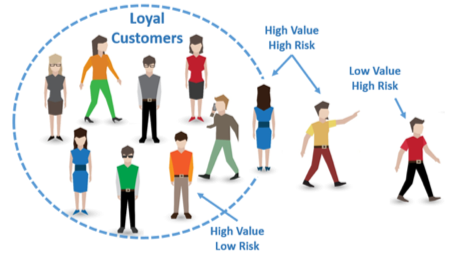

Deskripsi atribut pada dataset adalah sebagai berikut:
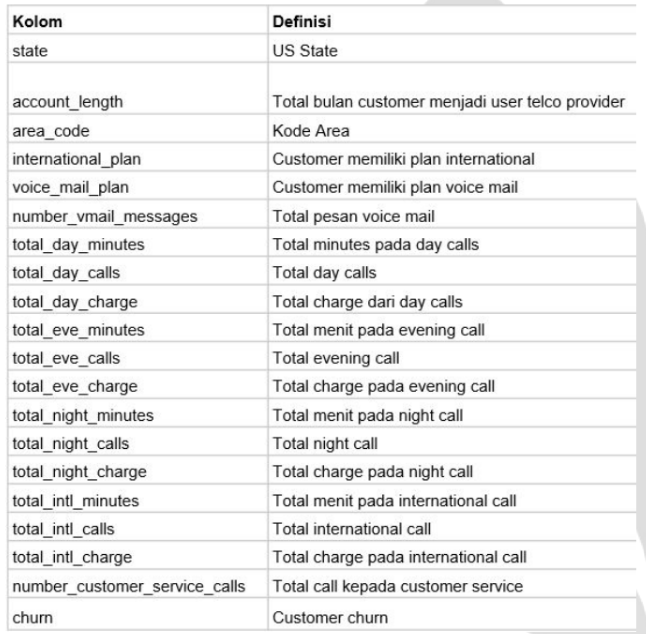

## Data Shapes
Pertama, kita akan mengetahui ukuran dari dataset.

In [ ]:
print("Dataframe mempunyai %d baris dan %d kolom" % df.shape)

Dataframe mempunyai 4250 baris dan 20 kolom


## Data Types
Selanjutnya, kita akan mengetahui tipe data dari masing-masing kolom di dataset.

In [ ]:
print("Tipe data dari masing-masing kolom dalam dataframe:")
display(df.dtypes)

Tipe data dari masing-masing kolom dalam dataframe:


state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

## Missing Values Detection
Pada tahapan ini kita akan mengobservasi apakah terdapat missing values pada masing-masing kolom di dalam dataset.

In [ ]:
print("Banyaknya missing values pada masing-masing kolom adalah sebagai berikut:")
display(df.isnull().sum())

Banyaknya missing values pada masing-masing kolom adalah sebagai berikut:


state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Terlihat bahwa tidak terdapat missing values pada dataset.

## Duplicated Data Detection
Pada tahapan ini kita akan mengobservasi apakah terdapat baris yang terduplikat pada dataset.

In [ ]:
if (True in df.duplicated().tolist()):
  print("Terdapat baris yang duplikat pada dataset.")
else:
  print("Tidak terdapat baris yang duplikat pada dataset")

Tidak terdapat baris yang duplikat pada dataset


Terlihat bahwa tidak terdapat baris duplikat pada dataset.

## Inconsitent Data Detection
Pada tahapan ini kita akan mengamati apakah terdapat data yang tidak konsisten pada kolom data yang mempuntai tipe Object dan Numerik.

### Inconsistent Object Data Type Detection
Kita akan melihat apakah terdapat data yang tidak konsisten pada masing-masing kolom yang mempunyai tipe object.



In [ ]:
# dataframe dengan tipe data object
df_category = df.select_dtypes(['object'])

# kita akan lihat data unik tiap kolom menggunakan looping
i = 0
while(i < df_category.shape[1]):
  display(df_category.iloc[:,i].unique())
  i = i + 1

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['yes', 'no'], dtype=object)

array(['no', 'yes'], dtype=object)

Terlihat sebagian besar data pada kolom yang mempunyai tipe data object dari dataset adalah konsisten. Namun, kita akan mengubah isi dari kolom area_code hanya berisi kodenya saja atau dengan kata lain kita akan menghapus prefix-nya.

In [ ]:
df['area_code'] = df['area_code'].str.split('_').str[2] 

### Inconsistent Numerical Data Type Detection
Kita akan melihat apakah terdapat data yang tidak konsisten pada masing-masing kolom yang mempunyai tipe numerik.

In [ ]:
# dataframe dengan tipe data numerik
df_numerical = df.select_dtypes(['int64','float64'])

#### Data Distribution
Untuk mendapatkan gambaran distribusi data numerik dari dataset, kita dapat menggunakan visualisasi histogram.

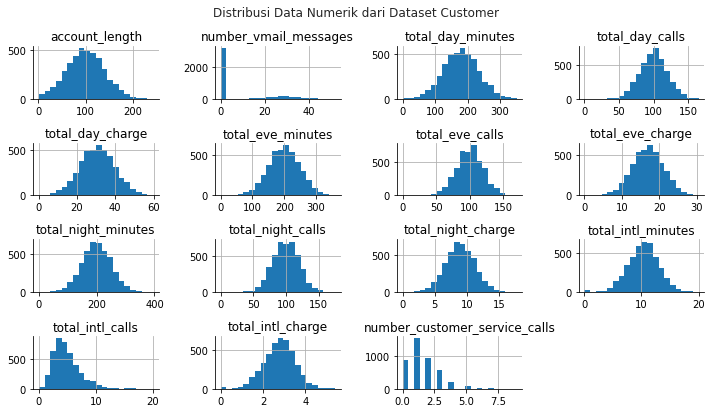

In [ ]:


# facet & geometric object
ax = df_numerical.hist(figsize = (10,6), bins=20)

# aesthetics
sns.set_style('ticks')
sns.despine()
plt.suptitle('Distribusi Data Numerik dari Dataset Customer')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Dari visualisasi di atas dapat dilihat bahwa data sebagian besar berdistribusi normal dengan variance yang berbeda-beda, dan beberapa distribusi skewed.

#### Outliers Detection
Untuk mendeteksi apakah data numerikal konsisten atau tidak, kita dapat melihat keberadaan outliers dari dataset. Untuk menggambarkan keberadaan outliers pada dataset dapat menggunakan visualisasi box plot.

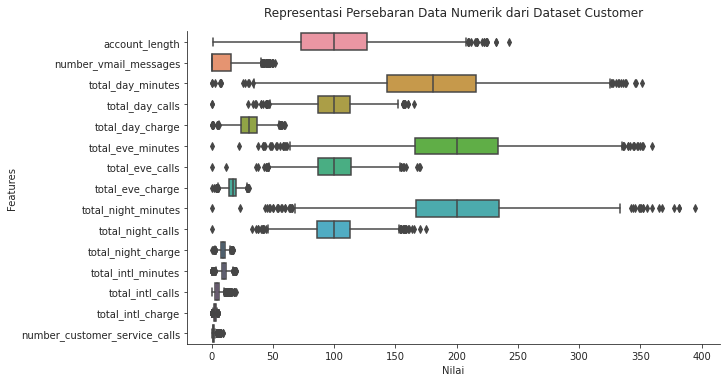

In [ ]:
# facet
plt.figure(figsize=(10,5)) 

# geometric object
sns.boxplot(data=df_numerical, orient='h')

# aesthetics
sns.set_style('whitegrid')
sns.despine()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Representasi Persebaran Data Numerik dari Dataset Customer", pad=15)
plt.ylabel("Features")
plt.xlabel("Nilai")
plt.xticks(rotation=360)
plt.show()

Dari visualisasi di atas dapat dilihat bahwa terdapat outliers pada dataset. Outliers tersebut akan kita tangani pada tahapan data pre-processing.

# Exploratory Data Analysis (EDA) & Statistical Analysis
Sebelum masuk ke proses Machine Learning, pada tahapan ini kita akan melakukan explorasi pada karakteristik data yang kita miliki menggunakan EDA dan Statistical Analysis. 

## Customer Churn Proportion
Pada tahapan ini kita akan melihat proporsi costumer yang churn dan yang tidak churn.

In [ ]:
!pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:


# geometric object
fig = px.pie(
             values = [df["churn"].value_counts()['yes'],
                       df["churn"].value_counts()['no']],
             names = ["Churn", "Not Churn"],
             title = 'Customer Churn Proportion')

# aesthetics
fig.update_traces(textfont_size = 20,
                  marker = dict(colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen'],
                                line = dict(color='#000000', width=2)))

fig.show()

Dari visualisasi di atas dapat dilihat bahwa lebih banyak costumer yang tidak churn atau beralih ke ISP lain dibandingkan costumer yang churn.

## Customer State & Churn Proportion
Pada tahapan ini kita akan melihat customer dari state mana saja yang churn. 

In [ ]:
# make datafarame based on state and churn proportion
df_state_churn_prop = df[['state','churn']].where(df.churn=='yes').value_counts().to_frame().reset_index()
df_state_churn_prop.rename(columns={0 : 'churn count'}, inplace=True)

# geometric object
fig = px.choropleth(df_state_churn_prop,
                    locations = 'state', 
                    locationmode = "USA-states", 
                    scope = "usa",
                    color = 'churn count',
                    color_continuous_scale = "Blues",
                    title = 'Customer State and Churn Proportion'
                    )
# aesthetics
fig.add_scattergeo(
    locations = df_state_churn_prop['state'],    
    locationmode = 'USA-states',
    text = df_state_churn_prop['state'],
    textfont=dict(color="Black"),
    mode='text',
    hoverinfo='skip')

fig.show()

Dapat dilihat dari visualisasi di atas bahwa state yang memiliki customer yang paling banyak yang churn adalah state NJ dengan 26 customer yang churn, dan state yang paling sedikit memiliki customer yang churn adalah AK dengan hanya 4 customer saja yang churn.

## Customer Area Code & Churn Proportion
Pada tahapan ini kita akan melihat proporsi area code customer yang churn.

In [ ]:
# geometri object
fig = px.pie(df[['area_code','churn']].where(df.churn=='yes').value_counts().to_frame().reset_index().rename(columns={0 : 'churn count'}),
              values = 'churn count',
              names = 'area_code',
              title = 'Customer Area Code & Churn Proportion')

# aesthetics
fig.update_traces(textfont_size = 20,
                    marker = dict(colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen'],
                                  line = dict(color='#000000', width=2)))

fig.show()

Dapat dilihat dari visualisasi di atas bahwa customer yang paling banyak churn adalah dari code area 415 dan yang paling sedikit adalah dari code area 408.

## Customer Plan & Churn Proportion
Pada tahapan ini kita akan melihat tipe plan apa yang paling banyak churn oleh customer.

In [ ]:
# geometric object
fig = px.pie(
             values = [df[["international_plan",'churn']].where(df.churn=='yes').value_counts()['yes'][0],
                       df[["voice_mail_plan",'churn']].where(df.churn=='yes').value_counts()['yes'][0]],
             names = ["International Plan", "Voice Mail Plan"],
             title = 'Customer Plan & Churn Proportion')

# aesthetics
fig.update_traces(textfont_size = 20,
                  marker = dict(colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen'],
                                line = dict(color='#000000', width=2)))

fig.show()

Dari visualisasi di atas bisa dilihat bahwa customer yang lebih banyak churn adalah pada tipe plan international dibandingkan dengan voice mail.

## Descriptive Statistics Analysis
Pada tahapan ini kita akan melihat rangkuman descriptive statistics dari kolom-kolom yang mempunyai tipe data numerik.

In [ ]:
# summary statistics dataframe
df_summary_stats = df_numerical.describe().loc['mean':,:].T.reset_index()
df_summary_stats.rename(columns={'index': 'feature'}, inplace=True)

# two zeros behind comma
pd.options.display.float_format = '{:,.2f}'.format
display(df_summary_stats)

,feature,mean,std,min,25%,50%,75%,max
0,account_length,100.24,39.70,1.00,73.00,100.00,127.00,243.00
1,number_vmail_messages,7.63,13.44,0.00,0.00,0.00,16.00,52.00
2,total_day_minutes,180.26,54.01,0.00,143.33,180.45,216.20,351.50
3,total_day_calls,99.91,19.85,0.00,87.00,100.00,113.00,165.00
4,total_day_charge,30.64,9.18,0.00,24.36,30.68,36.75,59.76
5,total_eve_minutes,200.17,50.25,0.00,165.93,200.70,233.78,359.30
6,total_eve_calls,100.18,19.91,0.00,87.00,100.00,114.00,170.00
7,total_eve_charge,17.02,4.27,0.00,14.10,17.06,19.87,30.54
8,total_night_minutes,200.53,50.35,0.00,167.22,200.45,234.70,395.00
9,total_night_calls,99.84,20.09,0.00,86.00,100.00,113.00,175.00


Dari tabel di atas kita dapat mengetahui karakteristk central tendency dan dispersion (spread) dari dataset. Nilai dari *mean* sangat sensitive terhadap nilai *max* atau *min*, oleh karena itu jika terdapat outliers maka nilai *max* atau *min* akan jauh dari nilai *mean*.  

## Inferential Statistics Analysis
Pada tahapan ini kita akan melakukan analsis inferential statistics.

### Numerical Data Correlation
Pada tahapan ini kita akan mencari hubungan linear antara masing-masing variabel numerik dari data.

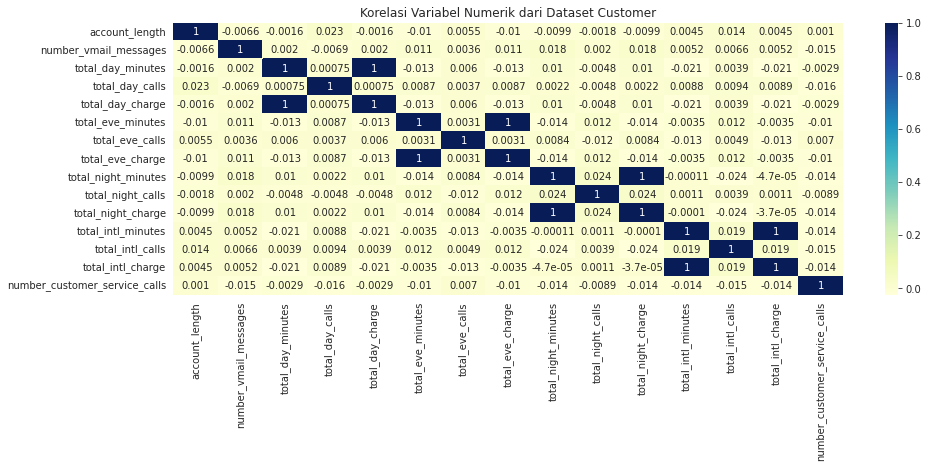

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df_numerical.corr(), annot=True, cmap="YlGnBu")
plt.title("Korelasi Variabel Numerik dari Dataset Customer")
plt.show()

Dari visualisasi di atas kita dapat melihat terdapat beberapa features tipe numerik yang berkolerasi sempurna positif, yaitu:
- *total_day_charge* dan *total_day_minutes*
- *total_eve_charge* dan *total_eve_minutes*
- total_night_charge dan *total_night_minutes*
- *total_intl_charge* dan *total_intl_minutes*

Berdasarkan features yang mempunyai korelasi positif tersebut, dapat diartikan bahwa **total menit pemakaian telepon berbanding lurus dengan total biaya yang dikenakan.**

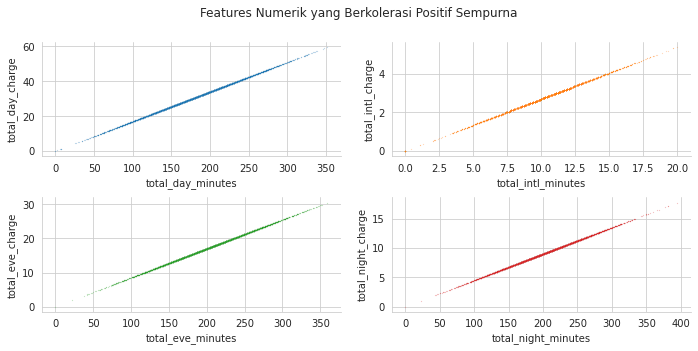

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5))
sns.set_style('ticks')
sns.despine()
fig.suptitle("Features Numerik yang Berkolerasi Positif Sempurna")
plt.tight_layout(rect=[0, 0.03, 1, 0.95], pad=2)

ax[0,0].plot(df['total_day_minutes'], df['total_day_charge'], 'o', markersize=0.1, color='tab:blue')
ax[0,0].set_xlabel('total_day_minutes')
ax[0,0].set_ylabel('total_day_charge')

ax[1,0].plot(df['total_eve_minutes'], df['total_eve_charge'], 'o', markersize=0.1, color='tab:green')
ax[1,0].set_xlabel('total_eve_minutes')
ax[1,0].set_ylabel('total_eve_charge')

ax[1,1].plot(df['total_night_minutes'], df['total_night_charge'], 'o', markersize=0.1, color='tab:red')
ax[1,1].set_xlabel('total_night_minutes')
ax[1,1].set_ylabel('total_night_charge')

ax[0,1].plot(df['total_intl_minutes'], df['total_intl_charge'], 'o', markersize=0.1, color='tab:orange')
ax[0,1].set_xlabel('total_intl_minutes')
ax[0,1].set_ylabel('total_intl_charge')

plt.show()

Visualisasi di atas menunjukkan beberapa features yang berkolerasi positif sempurna.

### Caterogical Data Correlation
Variabel target dapat bersifat kategorikal dan prediktornya dapat berupa kontinu atau kategorikal, saat keduanya kategorikal, maka relasi antara keduanya dapat diukur dengan menggunakan uji Chi-square.

#### Chi-square Test
Pertama, kita akan tentukan terlebih dahulu Null Hypothesis (H0):
- Asumsi (H0): Dua variabel kategorikal **tidak** berhubungan satu sama lain.
- Hasil dari Chi-square Test menunjukkan signifikansi probabilitas H0 diterima.

Pada projek ini kita akan mencari korelasi antara features kategorikal dengan apakah customer churn atau tidak. 

In [ ]:
# Cross tabulation between categorical features and churn
crosstab_state = pd.crosstab(index = df_category['state'],
                             columns = df_category['churn'])
crosstab_area = pd.crosstab(index = df_category['area_code'],
                             columns = df_category['churn'])
crosstab_international = pd.crosstab(index = df_category['international_plan'],
                             columns = df_category['churn'])
crosstab_voice = pd.crosstab(index = df_category['voice_mail_plan'],
                             columns = df_category['churn'])

In [ ]:


for i,j in zip([crosstab_area, crosstab_state, crosstab_international, crosstab_voice],
             ['Variabel Area Code', 'Variabel State', 'Variabel International Plan', 'Variabel Voice Mail Plan']):
  if stats.chi2_contingency(i)[1] >= 0.05:
    print("{} dan Variabel Churn tidak berhubungan satu sama lain.".format(j))
  else:
    print("{} dan Variabel Churn berhubungan satu sama lain.".format(j))

Variabel Area Code dan Variabel Churn tidak berhubungan satu sama lain.
Variabel State dan Variabel Churn berhubungan satu sama lain.
Variabel International Plan dan Variabel Churn berhubungan satu sama lain.
Variabel Voice Mail Plan dan Variabel Churn berhubungan satu sama lain.


Dari hasil di atas, dapat dilihat bahwa p-value lebih besar dari 0.05 sehingga H0 diterima, yaitu kedua variabel kategorikal tidak mempunyai relasi satu sama lain.

# Data Pre-processing
Pada tahapan ini kita akan menyiapkan data sebelum proses Machine Learning.

## Data Cleaning
Pada tahapan ini kita akan membersihkan data.

### Handling Outliers
Pada tahap sebelumnya kita telah mendeteksi keberadaan outliers, pada tahapan ini kita akan menghapus outliers tersebut untuk menyiapkan data pada proses Machine Learning.

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in df_numerical.columns.tolist():
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


## Data Transformation
Pada tahapan ini kita akan melakukan transformasi data.

### Feature Encoding
Untuk kolom variabel kategorikal, kita akan lakukan one-hot encoding.

In [ ]:
print(f'Jumlah baris dan kolom sebelum feature encoding: {df.shape}')

for cat in ['international_plan','voice_mail_plan','churn']:
  df[cat] = df[cat].astype(str).map({"no":0,"yes":1})
  
for cat in ['state','area_code']:
  one_hot_enc = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(one_hot_enc)

df = df.drop(['state','area_code'], axis=1)

print(f'Jumlah baris dan kolom setelah feature encoding: {df.shape}')

Jumlah baris dan kolom sebelum feature encoding: (3515, 20)
Jumlah baris dan kolom setelah feature encoding: (3515, 72)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Normalization
Pada tahap ini kita akan melakukan proses normalisasi.

In [ ]:


for col in df_numerical.columns.tolist():
  df[col] = MinMaxScaler().fit_transform(df[col].values.reshape(len(df),1))

# Machine Learning
Pada tahapan ini kita akan melakukan supervised machine learning, yaitu classification. 

## Predictor-Target Data Split
Pertama, kita akan membagi dataframe berdasarkan variabel dependen dan independen. 

In [ ]:
Y = df['churn']
X = df.drop(['churn'],axis=1)

## Train-Test Data Split
Lalu, kita akan bagi dataframe menjadi untuk train dan untuk test.

In [ ]:


test_size = 0.2
seed = 123
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

## Machine Learning Models
Tahapan ini kita akan mendefenisikan beberapa mode machine learning untuk classification.

In [ ]:


NaiveBayes = GaussianNB()
DecisionTree = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
RForest = RandomForestClassifier()

## Model Training & Evaluation Process 
Tahapan ini kita akan melakukan proses training dan mendapatkan hasil performance score hasil prediksi dari masing-masing model Machine Learning.

In [ ]:

# declare variables
lst_model_name = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN']
lst_classifier = [NaiveBayes, DecisionTree, RForest, KNN]
lst_pred = []
lst_TP = []
lst_TN = []
lst_FP = []
lst_FN = []
lst_f1 = []
lst_acc = []

# generate Y_pred list
for clf in lst_classifier:
  clf.fit(X_train, Y_train)
  lst_pred.append(clf.predict(X_test))

# generate confusion matrix
for Y_pred in lst_pred:
  tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel() # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
  lst_TP.append(tp)
  lst_TN.append(tn)
  lst_FP.append(fp)
  lst_FN.append(fn)
  lst_f1.append(f1_score(Y_test, Y_pred))
  lst_acc.append(accuracy_score(Y_test, Y_pred))

df_cmatrix = pd.DataFrame(list(zip(lst_model_name, lst_TP, lst_TN, lst_FP, lst_FN, lst_acc, lst_f1)),
                                columns=['Classifier','TP','TN','FP','FN', 'Accuracy','F-1 Score'])
df_cmatrix.sort_values(by=['F-1 Score'],ascending=False,inplace=True)
df_cmatrix.reset_index(inplace=True, drop=True)
df_cmatrix

,Classifier,TP,TN,FP,FN,Accuracy,F-1 Score
0,Random Forest,35,636,0,32,0.95,0.69
1,Decision Tree,46,603,33,21,0.92,0.63
2,Naive Bayes,42,418,218,25,0.65,0.26
3,KNN,0,631,5,67,0.90,0.00


Dapat dilihat bawah sebagian besar Model Machine Learning yang kita lakukan prediksi memiliki nilai False Positif dan False Negatif yang cukup jauh, oleh karena itu menghitung dan membandingkan nilai performance score setiap model akan menggunakan F1-score. Model yang mendapatkan nilai paling tinggi pada F-1 Score adalah Random Forest.

## Model Validation Process
Tahapan ini kita akan melakukan proses validasi menggunakan K-fold Cross Validation.

In [ ]:


# declare list for k-fold score 
lst_kfold_accuracy = []
lst_kfold_f1 = []

# generate cross validation score
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)
for clf in lst_classifier:
  lst_kfold_accuracy.append(cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())
  lst_kfold_f1.append(cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring='f1').mean())

df_cv = pd.DataFrame(list(zip(lst_model_name, lst_kfold_accuracy, lst_kfold_f1)),
                     columns=['Classifier','Accuracy','F-1 Score'])
df_cv.sort_values(by=['F-1 Score'],ascending=False,inplace=True)
df_cv.reset_index(inplace=True, drop=True)
df_cv

,Classifier,Accuracy,F-1 Score
0,Random Forest,0.95,0.70
1,Decision Tree,0.92,0.66
2,Naive Bayes,0.52,0.23
3,KNN,0.89,0.06


Berdasarkan hasil cross validation dengan k=5, Model **Random Forest** memiliki akurasi dan F-1 Score yang paling tinggi.

## Model Prediction
Selanjutnya, kita akan melakukan prediksi pada data df_predict berdasarkan model machine learning yang telah kita training pada tahapan sebelumnya.

In [ ]:
# data predict pre-processing

# remove prefix in column code_area 
df_predict['area_code'] = df_predict['area_code'].str.split('_').str[2] 

# feature encoding
for cat in ['international_plan','voice_mail_plan']:
  df_predict[cat] = df_predict[cat].astype(str).map({"no":0,"yes":1})
  
for cat in ['state','area_code']:
  one_hot_enc = pd.get_dummies(df_predict[cat], prefix=cat)
  df_predict = df_predict.join(one_hot_enc)

df_predict = df_predict.drop(['state','area_code'], axis=1)

# normalization
for col in df_numerical.columns.tolist():
  df_predict[col] = MinMaxScaler().fit_transform(df_predict[col].values.reshape(len(df_predict),1))

df_predict.head()

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510
0,1,0.54,0,1,0.49,0.75,0.57,0.75,0.50,0.49,...,0,0,0,0,0,0,0,0,1,0
1,2,0.49,1,0,0.00,0.62,0.48,0.62,0.57,0.50,...,0,0,0,0,0,0,0,0,0,1
2,3,0.26,0,0,0.00,0.32,0.25,0.32,0.83,0.31,...,0,0,0,0,0,0,0,0,1,0
3,4,0.39,0,0,0.00,0.53,0.60,0.53,0.56,0.58,...,0,0,1,0,0,0,0,0,0,1
4,5,0.73,0,0,0.00,0.33,0.30,0.33,0.74,0.59,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
prediction = RForest.predict(df_predict.loc[:,'account_length':])
df_submission = pd.DataFrame({"Customer ID": df_predict['id'],
                             "Churn":prediction})
print("Berdasarkan hasil prediksi model Machine Learning, Customer ID yang churn adalah sebagai berikut:")
display(df_submission[df_submission['Churn']==1])

Berdasarkan hasil prediksi model Machine Learning, Customer ID yang churn adalah sebagai berikut:


,Customer ID,Churn
37,38,1
62,63,1
104,105,1
108,109,1
149,150,1
227,228,1
250,251,1
253,254,1
275,276,1
291,292,1
